<h2>Technical Information of Nobel Prize Dataset</h2>

In [1]:
import pandas as pd

nobel_data = pd.read_csv('nobel_prize_data.csv')

def date_column():
  dates = pd.to_datetime(nobel_data['birth_date'])
  nobel_data['birth_date'] = dates

date_column()

nobel_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

<h2>First 5 Recorded Nobel Prizes</h2>

In [2]:
nobel_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


<h2>Most Recent Nobel Prizes in Dataset</h2>

In [3]:
nobel_data.tail()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU
961,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery that black hole formation i...,1/2,Individual,Roger Penrose,1931-08-08,Colchester,United Kingdom,United Kingdom,Male,University of Oxford,Oxford,United Kingdom,GBR


<h2>Checking For Duplicates in Dataset</h2>

In [4]:
any_duplicates = pd.DataFrame(nobel_data.duplicated(keep='first'), columns=['Status'])
any_duplicates[any_duplicates.Status == True].count()[0]

0

<h2>Columns With Null Values</h2>

In [5]:
def num_null(column):
  df = pd.DataFrame(nobel_data[column])
  df = df.isna()
  result = df[df[column] == True].count()[0]

  return result


columns = nobel_data.columns

num_nulls = []

for column in columns:
  num = num_null(column)
  num_nulls.append(num)

null_df = pd.DataFrame(num_nulls,
                       columns=['Number of Null Rows'], index=columns)

null_df


,Number of Null Rows
year,0
category,0
prize,0
motivation,88
prize_share,0
laureate_type,0
full_name,0
birth_date,28
birth_city,31
birth_country,28


In [6]:
numerator = nobel_data['prize_share'].str[0].astype(int)
denominator = nobel_data['prize_share'].str[2].astype(int)
percentage = numerator / denominator
percentage = (percentage * 100).astype(int)
share_pct = percentage.astype(str) + '%'

nobel_data.insert(5, 'Share %', share_pct)
nobel_data

,year,category,prize,motivation,prize_share,Share %,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,100%,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,100%,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,100%,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,50%,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,50%,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,33%,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,100%,Organization,World Food Programme (WFP),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,25%,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,25%,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU


<h2>Number of Nobel Prize Winners by Gender</h2>

In [7]:
import plotly.express as px

gender_data = nobel_data.dropna()
gender_data = nobel_data.drop_duplicates('full_name')
gender_data = gender_data['sex'].value_counts()

donut = px.pie(labels=gender_data.index,
               values=gender_data.values,
               names=gender_data.index,
               hole=0.6)

donut.show()

<h2>First 3 Female Nobel Prize Winners</h2>
<p>Organization columns were removed as they were not affiliated with any.</p>

In [8]:
women_winners = nobel_data[nobel_data.sex == 'Female'][:3]
women_winners = women_winners.drop(columns=['organization_name', 'organization_city', 'organization_country'])
women_winners

,year,category,prize,motivation,prize_share,Share %,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,ISO
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,25%,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,POL
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,100%,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,CZE
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,100%,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,SWE


<h2>Nobel Prize Winners That Won Multiple Times</h2>

In [9]:
def find_names(names):
  name_indexes = []

  for name in names:
    row = nobel_data[nobel_data.full_name == name]
    name_indexes += list(row.index)

  return name_indexes

full_names = nobel_data['full_name'].value_counts()
multiple = full_names[full_names.values > 1][::-1]
full_names = list(multiple.index)

indexes = find_names(full_names)

multiple_times = nobel_data.query('@indexes')
multiple_times = multiple_times.drop(columns=['prize_share', 'organization_city', 'ISO'])
multiple_times

,year,category,prize,motivation,Share %,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_country
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",25%,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",100%,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,Sorbonne University,France
283,1954,Peace,The Nobel Peace Prize 1954,NaN,100%,Organization,Office of the United Nations High Commissioner...,NaT,NaN,NaN,NaN,NaN,NaN,NaN
523,1981,Peace,The Nobel Peace Prize 1981,NaN,100%,Organization,Office of the United Nations High Commissioner...,NaT,NaN,NaN,NaN,NaN,NaN,NaN
297,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",33%,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,United States of America,Male,University of Illinois,United States of America
424,1972,Physics,The Nobel Prize in Physics 1972,"""for their jointly developed theory of superco...",33%,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,United States of America,Male,University of Illinois,United States of America
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",100%,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,United States of America,Male,California Institute of Technology (Caltech),United States of America
340,1962,Peace,The Nobel Peace Prize 1962,NaN,100%,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,United States of America,Male,California Institute of Technology (Caltech),United States of America
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",100%,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,United Kingdom,Male,University of Cambridge,United Kingdom
505,1980,Chemistry,The Nobel Prize in Chemistry 1980,"""for their contributions concerning the determ...",25%,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,United Kingdom,Male,MRC Laboratory of Molecular Biology,United Kingdom


<h2>Nobel Prizes Awarded by Category</h2>

In [10]:
categories = nobel_data['category'].value_counts()

bar_labels = {'x': 'Categories',
              'y': 'Awards'}

category_bar = px.bar(x=categories.index,
                      y=categories.values,
                      labels=bar_labels,
                      color=categories.values,
                      color_continuous_scale=px.colors.sequential.Aggrnyl)

category_bar.show()

<h2>Top 5 Nobel Prize Awards in Economics</h2>

In [11]:
economic = nobel_data.category == 'Economics'
economic_awards = nobel_data.query('@economic')
economic_awards = economic_awards.drop(columns=['prize_share', 'ISO', 'laureate_type'])
economic_awards.head()


,year,category,prize,motivation,Share %,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",50%,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",50%,Ragnar Frisch,1895-03-03,Oslo,Norway,Norway,Male,University of Oslo,Oslo,Norway
402,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the scientific work through which he has ...",100%,Paul A. Samuelson,1915-05-15,"Gary, IN",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America
411,1971,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for his empirically founded interpretation of...",100%,Simon Kuznets,1901-04-30,Pinsk,Russian Empire (Belarus),Belarus,Male,Harvard University,"Cambridge, MA",United States of America
419,1972,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for their pioneering contributions to general...",50%,John R. Hicks,1904-04-08,Warwick,United Kingdom,United Kingdom,Male,University of Oxford,Oxford,United Kingdom


<h2>Number of Peace Prizes Awarded by Category and Gender</h2>

In [12]:

cate_awards = nobel_data.groupby(['category', 'sex'], as_index = False).count()
cate_awards = cate_awards[['category', 'sex', 'prize']][::-1]

bar = px.bar(cate_awards, x='category', y='prize', color='sex')

bar.show()

<h2>Number of Nobel Prizes Awarded by Year</h2>

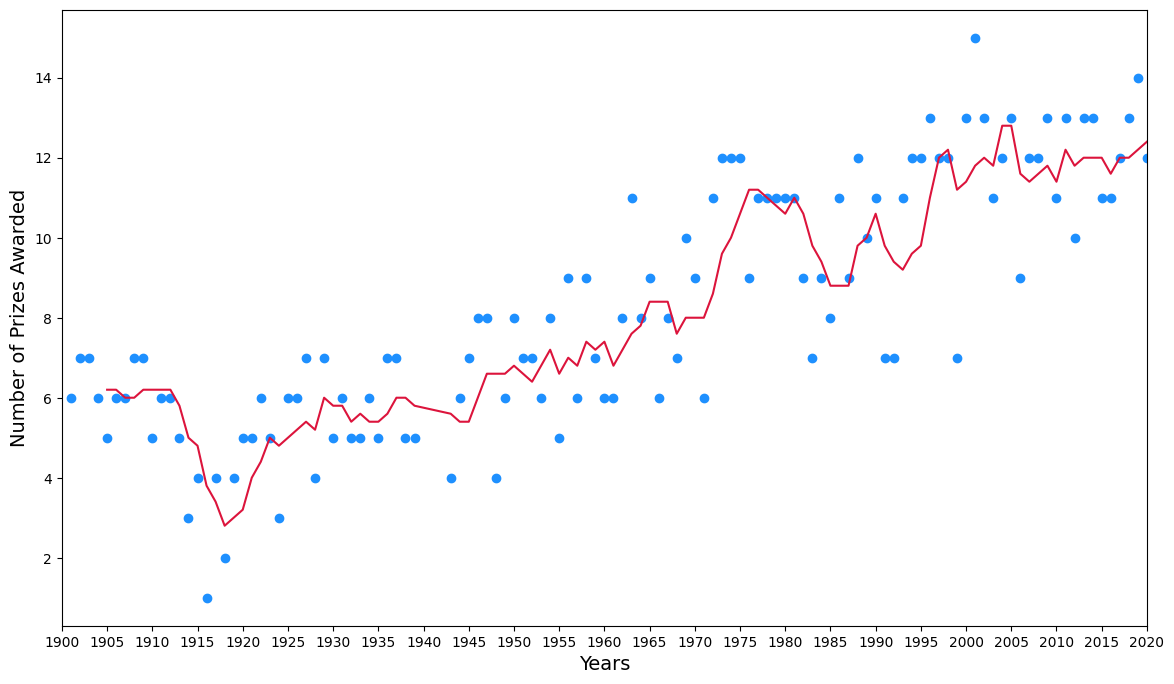

In [13]:
import numpy as np
from matplotlib.pyplot import plot, scatter, xticks, figure, xlim, xlabel, ylabel
from matplotlib import dates

fig = figure(figsize=(14, 8))

count_by_year = nobel_data['year'].value_counts()
count_by_year = count_by_year.sort_index()

scat = scatter(x=count_by_year.index,
               y=count_by_year.values,
               c='dodgerblue')

plot(count_by_year.rolling(5, min_periods=5).mean(), color='crimson')

xticks(np.arange(count_by_year.index.min() - 1, count_by_year.index.max() + 1, 5))
xlim(count_by_year.index.min() - 1, count_by_year.index.max())
xlabel('Years', fontsize=14)
ylabel('Number of Prizes Awarded', fontsize=14)

fig.show()

<h2>Average Nobel Prizeholder Share Over Time With Previous Plot</h2>

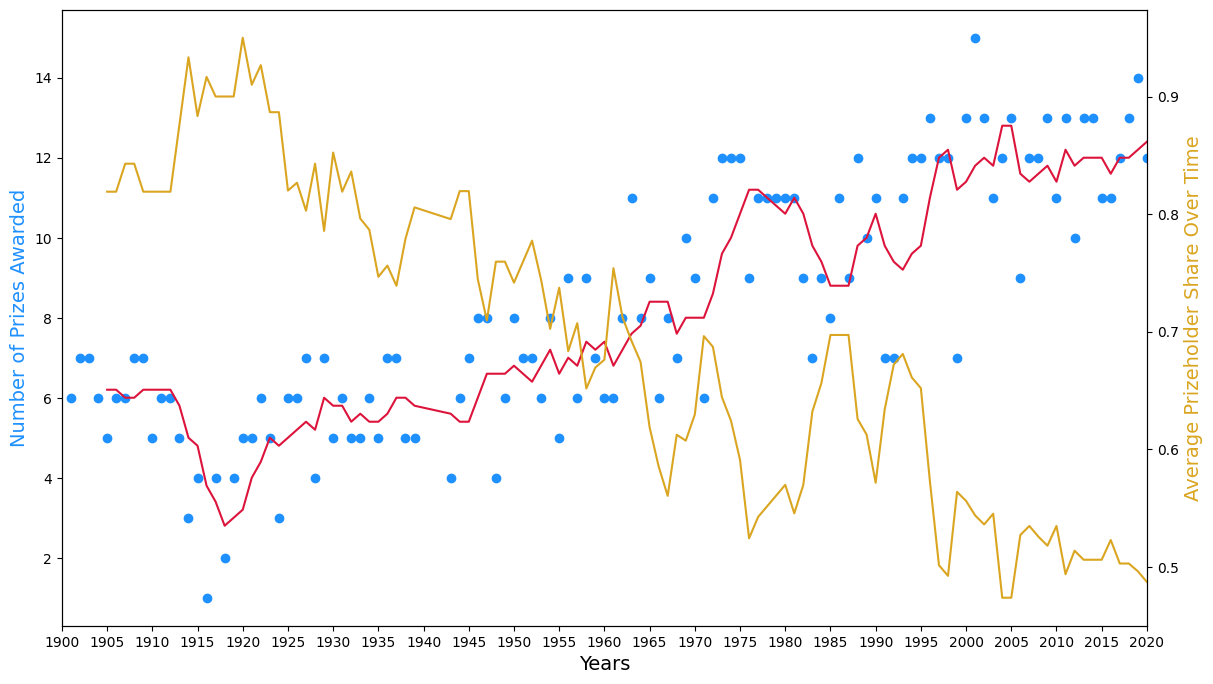

In [14]:
from matplotlib.pyplot import gca

fig = figure(figsize=(14, 8))
ax1 = gca()

count_by_year = nobel_data['year'].value_counts()
count_by_year = count_by_year.sort_index()

numerator = nobel_data['prize_share'].str[0].astype(int)
denominator = nobel_data['prize_share'].str[2].astype(int)
percentage = numerator / denominator

sy_data = pd.DataFrame(nobel_data.year)
sy_data.insert(1, 'share', percentage)
sy_data = sy_data.groupby('year').mean('share')

ax1.scat = scatter(x=count_by_year.index,
               y=count_by_year.values,
               c='dodgerblue')

ax1.plot(count_by_year.rolling(5, min_periods=5).mean(), color='crimson')
ax2 = ax1.twinx()
ax2.set_ylabel('Average Prizeholder Share Over Time', fontsize=14, color='goldenrod')
ax2.plot(sy_data.index, sy_data.share.rolling(5, min_periods=5).mean(), color='goldenrod')

xlim(count_by_year.index.min() - 1, count_by_year.index.max())
xticks(np.arange(count_by_year.index.min() - 1, count_by_year.index.max() + 1, 5))
ax1.set_xlim(count_by_year.index.min() - 1, count_by_year.index.max())
ax1.set_xlabel('Years', fontsize=14)
ax1.set_ylabel('Number of Prizes Awarded', fontsize=14, color='dodgerblue')

fig.show()

<h2>Number of Prizes Awarded by Country</h2>

In [15]:
cp_data = nobel_data.groupby('birth_country_current', as_index=False)['prize'].count()
cp_data = cp_data.sort_values('prize', ascending=False)[:20][::-1]

cp_labels = {'x': 'Number of Prizes Awarded', 'y': 'Countries'}

cp_bar = px.bar(x=cp_data.prize, y=cp_data.birth_country_current,
                orientation='h', color=cp_data.prize,
                color_continuous_scale=px.colors.sequential.Viridis)

cp_bar.update_layout(
    yaxis=dict(title='Countries'),
    xaxis=dict(title='Number of Nobel Peace Prizes Awarded'))

cp_bar.show()

<h2>Geographical Representation of Number of Prizes Awarded by Country</h2>

In [16]:


cp_data = nobel_data.groupby('ISO', as_index=False).agg({'prize': pd.Series.count})
cp_data

geo = px.choropleth(cp_data,
                    locations=cp_data.ISO,
                    color=cp_data.prize,
                    color_continuous_scale=px.colors.sequential.matter)

geo.show()

<h2>Number of Nobel Prizes Awarded by Top 20 Countries</h2>

In [17]:
df = nobel_data.groupby(['birth_country_current', 'category'], as_index=False).count()
df = df[['birth_country_current', 'category', 'prize']]

total_count = nobel_data.groupby('birth_country_current').count()['prize']
total_count = pd.DataFrame(total_count)
total_count = total_count.sort_values('prize', ascending=False)[:20]


cc_data = df.merge(total_count,
                   left_on=df.birth_country_current,
                   right_on=total_count.index)

cc_data.drop(columns=['key_0'])
cc_data = cc_data.sort_values('prize_x')

cc_bar = px.bar(cc_data, x='prize_x', y='birth_country_current',
                color='category', orientation='h')

cc_bar.update_layout(yaxis=dict(title='Top 20 Countries'),
                     xaxis=dict(title='Number of Nobel Peace Prizes Awarded'))

cc_bar.show()

<h2>Number of Nobel Prizes by Top 20 Countries Over Time</h2>

In [18]:
country_count = nobel_data.groupby(['birth_country_current', 'year'], as_index=False).count()
country_count = country_count.sort_values('year')[['birth_country_current', 'year', 'prize']]

country_count = country_count.groupby([
    'birth_country_current', 'year']).sum().groupby(level=[0]).cumsum()

country_count.reset_index(inplace=True)

count_line = px.line(country_count, x='year', y='prize',
                     color='birth_country_current')

count_line.update_layout(xaxis=dict(title='Years'),
                         yaxis=dict(title='Number of Nobel Peace Prizes Awarded'))

count_line.show()

<h2>Number of Nobel Prize Recipients by Top 20 Organizations</h2>

In [19]:
org_count = nobel_data.groupby('organization_name', as_index=False).agg({'prize': pd.Series.count})
org_count = org_count.sort_values('prize', ascending=False)[:20][::-1]

org_bar = px.bar(org_count, x='prize',
                 y='organization_name',
                 color='prize',
                 orientation='h',
                 color_continuous_scale=px.colors.sequential.Cividis)

org_bar.update_layout(yaxis=dict(title='Top 20 Organizations'),
                                 xaxis=dict(title='Number of Prizes Awarded'))

org_bar.show()

<h2>Number of Nobel Prizes Awarded by Top 20 Cities</h2>

In [20]:
city_count = nobel_data.groupby('organization_city', as_index=False).agg({'prize': pd.Series.count})
city_count = city_count.sort_values('prize', ascending=False)[:20][::-1]

cc_bar = px.bar(city_count, x='prize',
                y='organization_city',
                color='prize',
                orientation='h',
                color_continuous_scale=px.colors.sequential.Brwnyl)

cc_bar.update_layout(xaxis=dict(title='Number of Prizes Awarded'),
                     yaxis=dict(title='Top 20 Cities'))

cc_bar.show()

<h2>Number of Nobel Prizes Awarded by Top 20 Recipient Hometowns</h2>

In [21]:
bcity_count = nobel_data.groupby('birth_city', as_index=False).agg({'prize': pd.Series.count})
bcity_count = bcity_count.sort_values('prize', ascending=False)[:20][::-1]

bcc_bar = px.bar(bcity_count, x='prize',
                 y='birth_city',
                 color='prize',
                 orientation='h',
                 color_continuous_scale=px.colors.sequential.Agsunset)

bcc_bar.update_layout(xaxis=dict(title='Number of Prizes Awarded'),
                      yaxis=dict(title='Top 20 Recipient Hometowns'))



<h2>Sunburst Chart for Number of Prizes Awarded by Organization</h2>

In [73]:
org_count = nobel_data.groupby(['organization_name', 'organization_country', 'organization_city'], as_index=False)['prize'].count()
org_count = org_count.sort_values('prize', ascending=False)

sun_chart = px.sunburst(org_count,
                        path=['organization_country', 'organization_city', 'organization_name'],
                        values='prize')

sun_chart.show()

<h2>The Youngest Nobel Prize Award-Winner</h2>

In [98]:
birthdays = nobel_data['birth_date'].dropna()
b_indexes = birthdays.index
clean_birth = nobel_data.query('@b_indexes')

birth_year = clean_birth['birth_date'].dt.year
age = clean_birth['year'] - birth_year

clean_birth = clean_birth[['year', 'category', 'full_name', 'birth_date', 'birth_country_current']]
clean_birth.insert(3, 'age', age)

min_age = clean_birth.age.min()
youngest = clean_birth[clean_birth.age == min_age]
youngest = pd.DataFrame(youngest)
youngest


,year,category,full_name,age,birth_date,birth_country_current
885,2014,Peace,Malala Yousafzai,17,1997-07-12,Pakistan


<h2>The Oldest Nobel Prize Award-Winner</h2>

In [99]:
max_age = clean_birth.age.max()
oldest = clean_birth[clean_birth.age == max_age]
oldest = pd.DataFrame(oldest)
oldest

,year,category,full_name,age,birth_date,birth_country_current
937,2019,Chemistry,John Goodenough,97,1922-07-25,Germany


<h2>Description of Average Prize Winner Age</h2>

In [120]:
pd.options.display.float_format = '{:,.2f}'.format

mean_age_data = clean_birth.age.describe()
mean_age_data = pd.DataFrame(mean_age_data)
mean_age_data

,age
count,934.00
mean,59.95
std,12.62
min,17.00
25%,51.00
50%,60.00
75%,69.00
max,97.00


<h2>Visual Distribution of Prize Winner Age</h2>

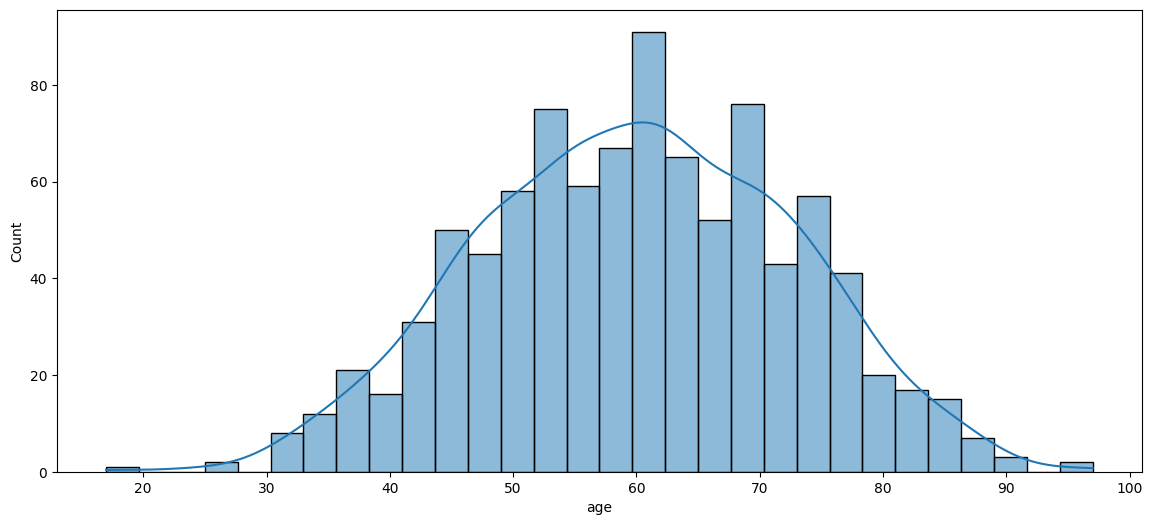

In [129]:
import seaborn as sb
figure(figsize=(14, 6))

pd.options.display.float_format = '{:,.2f}'.format

my_hist = sb.histplot(clean_birth, x='age', kde=True, bins=30)


<h2>Age of Nobel Prize Winners Over Time</h2>

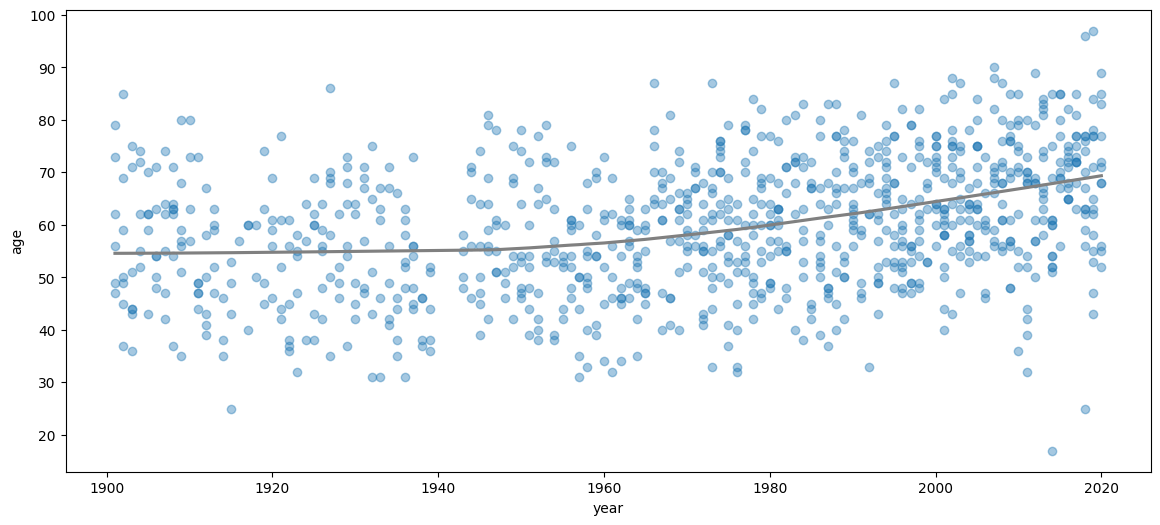

In [134]:
figure(figsize=(14, 6))
rplot = sb.regplot(clean_birth, x='year', y='age',
                   lowess=True, scatter_kws={'alpha': 0.4},
                   line_kws={'color': 'gray'})

<h2>Box Plot of Prize Winner Age by Category</h2>

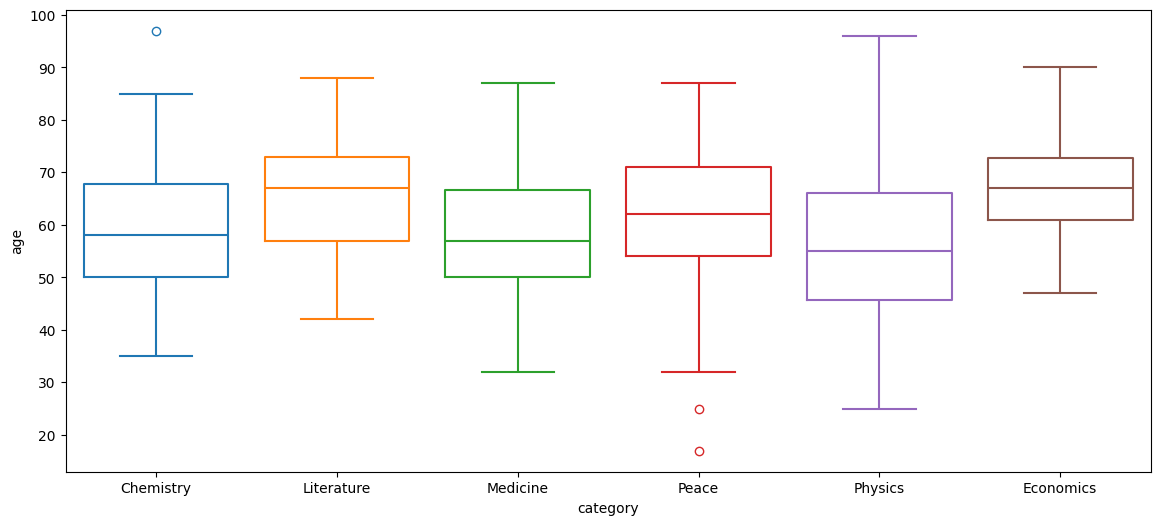

In [149]:
figure(figsize=(14, 6))

bplot = sb.boxplot(clean_birth, x='category', y='age', fill=False, hue='category')

<h2>Scatter Plots of Prize Winner with Regression</h2>

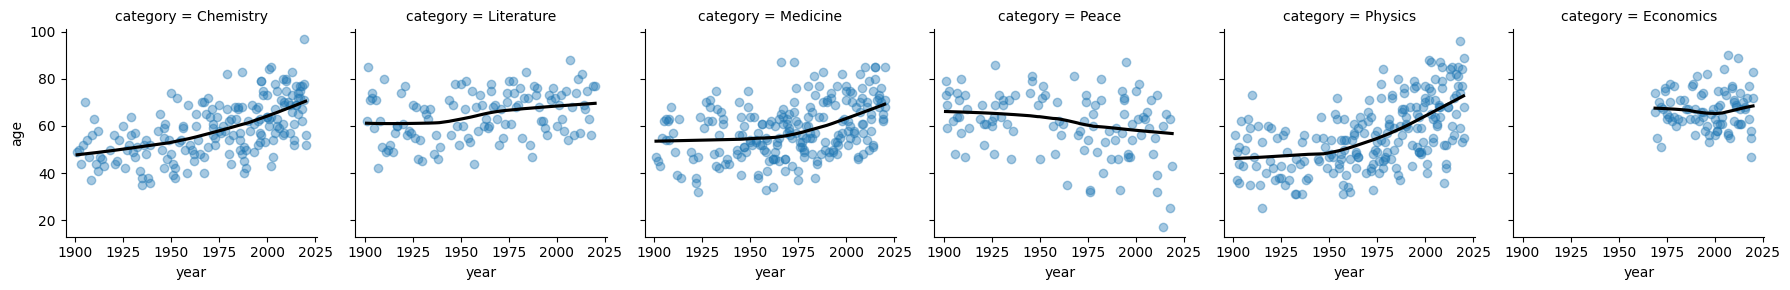

In [148]:
sr_plot = sb.lmplot(data=clean_birth, x='year',
                    y='age', col='category',
                    lowess=True, height=3,
                    line_kws={'color': 'black'},
                    scatter_kws={'alpha': 0.4})